## 1. Load Libraries

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Stef0916/chemoinformatics-bioinformatics/blob/main/acetylcholinesterase-QSAR/notebooks/3-Exploratory-Data-Analysis.ipynb)

In [1]:
!pip install rdkit

In [2]:
!pip install mols2grid

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.ML.Cluster import Butina
import mols2grid
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)

import rdkit
rdkit.__version__

'2023.09.1'

## 2. Load Data

In [4]:
data = PandasTools.LoadSDF('/content/data_class_sanitized.sdf', molColName='Molecule')

In [5]:
data.drop('ID', axis=1, inplace=True)

molecule_chembl_id                                     curated_smiles  \
0         CHEMBL3234040  CC1=CC2Cc3nc4cc(Cl)ccc4c(NCc4ccc(CNC(=O)c5cc(O...   
1         CHEMBL4854913  CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCC(=O)N4CCNC(...   
2         CHEMBL1761995       c1ccc2c(c1)ccc[n+]2CCCCCCCC[n+]1cccc2ccccc21   
3         CHEMBL1200970                   CCN(CC)C(C)CN1c2ccccc2Sc2ccccc21   
4         CHEMBL4760651                   Clc1ccc(CNC2CCN(Cc3ccccc3)C2)cc1   
...                 ...                                                ...   
5729       CHEMBL238230  O=C(CCCNc1c2c(nc3ccccc13)CCCC2)CCCNc1c2c(nc3cc...   
5730       CHEMBL161880                           Clc1cccc2c1CN1CCCCCC1=N2   
5731      CHEMBL4859041  O=C(CC1CCN(Cc2ccc(F)cc2)CC1)Nc1[nH]nc2cc(-c3cc...   
5732      CHEMBL5090352  COC1C=C2C3CN(Cc4cc5c(cc43)OCO5)C2CC1OC(=O)c1cc...   
5733       CHEMBL381926                  CCNC(=O)Oc1ccc2c(c1)C1(C)CCOC1N2C   

         class Label      pIC50  \
0       active     1  -1.260071   
1       active     1   0.387216   
2       active     1   -1.90309   
3     inactive     0    -6.0086   
4       active     1   -2.25042   
...        ...   ...        ...   
5729    active     1  -0.262451   
5730    active     1  -3.230449   
5731    active     1   -2.71433   
5732  inactive     0       -5.0   
5733    active     1  -1.913814   

                                              Molecule  
0     <rdkit.Chem.rdchem.Mol object at 0x785b1f317610>  
1     <rdkit.Chem.rdchem.Mol object at 0x785b1f317840>  
2     <rdkit.Chem.rdchem.Mol object at 0x785b1f3178b0>  
3     <rdkit.Chem.rdchem.Mol object at 0x785b1f317990>  
4     <rdkit.Chem.rdchem.Mol object at 0x785b1f317a00>  
...                                                ...  
5729  <rdkit.Chem.rdchem.Mol object at 0x785b1e3011c0>  
5730  <rdkit.Chem.rdchem.Mol object at 0x785b1e3012a0>  
5731  <rdkit.Chem.rdchem.Mol object at 0x785b1e301380>  
5732  <rdkit.Chem.rdchem.Mol object at 0x785b1e3013f0>  
5733  <rdkit.Chem.rdchem.Mol object at 0x785b1e3014d0>  

[5734 rows x 6 columns]
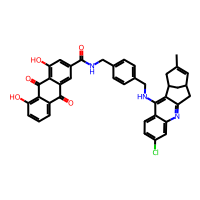
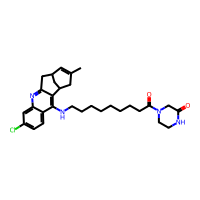
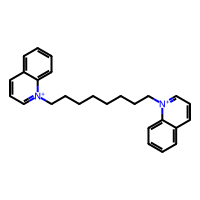
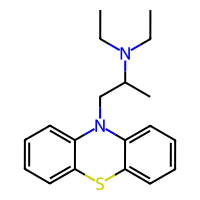
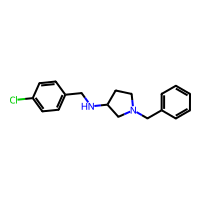
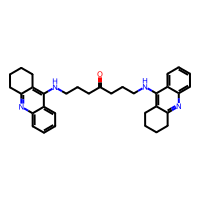
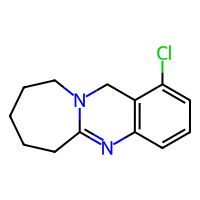
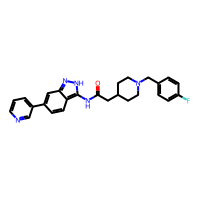
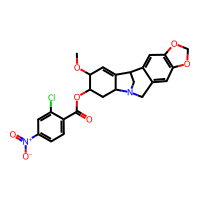
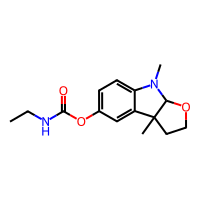

In [6]:
data

In [7]:
data['pIC50'].dtypes

dtype('O')

In [8]:
data['pIC50'] = data['pIC50'].astype('float64')

In [9]:
data['Label'] = data['Label'].astype('int')

In [10]:
data.dtypes

molecule_chembl_id     object
curated_smiles         object
class                  object
Label                   int64
pIC50                 float64
Molecule               object
dtype: object

## 3. Visualization

### 3.1 Grid Molecules

In [11]:
mols2grid.display(data, smiles_col = 'curated_smiles', mol_col = 'Molecule',
                  subset = ['pIC50', 'Label', 'class'], transform = {"pIC50": lambda x: f"{x:.2f}"})

MolGridWidget()

### 3.2 Bioactivity Class

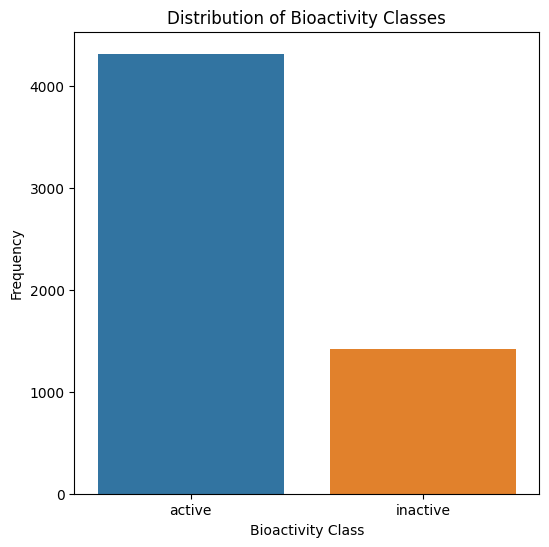

In [12]:
plt.figure(figsize=(6,6))

ax = sns.countplot(x='class', data=data)
plt.title('Distribution of Bioactivity Classes')
plt.xlabel('Bioactivity Class')
plt.ylabel('Frequency')

plt.show()

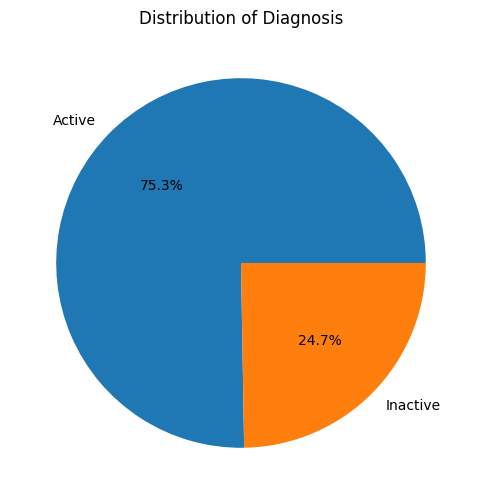

In [13]:
plt.figure(figsize=(6,6))

plt.pie(data['class'].value_counts(), labels=['Active', 'Inactive'], autopct='%1.1f%%')
plt.title('Distribution of Diagnosis')

plt.show()

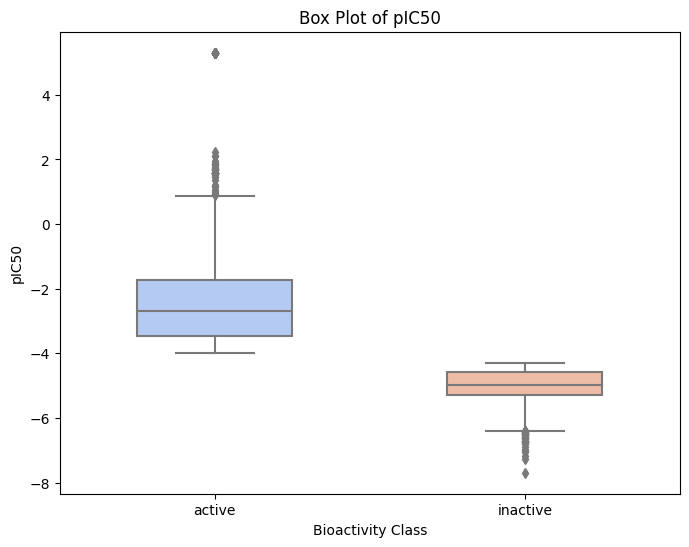

In [14]:
plt.figure(figsize=(8, 6))

sns.boxplot(x='class', y=data['pIC50'], data=data, palette="coolwarm", width=0.5)

plt.title(f'Box Plot of pIC50')
plt.xlabel('Bioactivity Class')
plt.ylabel('pIC50')

plt.show()

## 4. Splitting data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = data.drop('Label', axis=1)
y = data['Label']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
X_train

molecule_chembl_id                                     curated_smiles  \
3660       CHEMBL459825  CC(C)(OC1OC(CO)C(O)C(O)C1O)C1Cc2cc3ccc(=O)oc3c...   
3523      CHEMBL4444822  NC(Cc1c[nH]c2ccccc12)C(=O)NCCNc1c2c(nc3cc(Cl)c...   
733       CHEMBL4445026  C(=NNc1c2c(nc3ccccc13)CCCC2)c1ccc(OCc2cn(-c3cc...   
3375       CHEMBL342413       O=c1[nH]c2ccccc2c(=O)n1CCC1CCN(Cc2ccccc2)CC1   
4466      CHEMBL4776936  CCN(C)C(=O)Oc1ccc(C=CC(=O)N2CCC(Cc3ccccc3)CC2)cc1   
...                 ...                                                ...   
3772      CHEMBL4782029  Cc1ccc(C(=O)N2CCN(CC(=O)N3CCN(CCCc4c[nH]c5ccc(...   
5191      CHEMBL3917990    COc1ccc(C=CC(=O)Nc2ccc(CN(C)Cc3ccccc3)cc2)cc1OC   
5226       CHEMBL340621      O=C(c1ccncc1)N(CCC1CCN(Cc2ccccc2)CC1)c1ccccc1   
5390      CHEMBL3605426  CN(C)CCCC1(c2ccc(F)cc2)OCc2cc(-c3n[nH]c(-c4ccc...   
860        CHEMBL433678  CC(=O)Nc1ccc2c(c1)C(=O)N(CCC1CCN(Cc3ccccc3)CC1...   

         class     pIC50                                          Molecule  
3660  inactive -4.832509  <rdkit.Chem.rdchem.Mol object at 0x785b1e4b9850>  
3523    active -2.204120  <rdkit.Chem.rdchem.Mol object at 0x785b1e498a50>  
733     active -2.954243  <rdkit.Chem.rdchem.Mol object at 0x785b1e772e30>  
3375    active -0.623249  <rdkit.Chem.rdchem.Mol object at 0x785b1e45b220>  
4466  inactive -4.432969  <rdkit.Chem.rdchem.Mol object at 0x785b1e38ee30>  
...        ...       ...                                               ...  
3772    active -3.556303  <rdkit.Chem.rdchem.Mol object at 0x785b1e4d5b60>  
5191    active -3.471292  <rdkit.Chem.rdchem.Mol object at 0x785b1e261a10>  
5226    active -1.806180  <rdkit.Chem.rdchem.Mol object at 0x785b1e262ff0>  
5390  inactive -5.416024  <rdkit.Chem.rdchem.Mol object at 0x785b1e29d150>  
860     active -0.447158  <rdkit.Chem.rdchem.Mol object at 0x785b1e7938b0>  

[4587 rows x 5 columns]

In [20]:
X_test

molecule_chembl_id                                     curated_smiles  \
4200      CHEMBL4863598                            c1ccc2oc(C3CCNCC3)cc2c1   
4523      CHEMBL1190535                COc1cc(C(C#N)N2CCN(C)CC2)cc(OC)c1OC   
5039       CHEMBL275537              CN(C)Cc1ccc(CSCCCSCc2ccc(CN(C)C)o2)o1   
5271        CHEMBL24844  COc1ccc(-c2cc3c(c(=O)o2)C(=O)C2C4(C)CCC(O)C(C)...   
4570       CHEMBL553245  O=C1C=C2SC3CC24c2c(c(O)c5c6c2N(CC=C6C=N5)C1C4O)N3   
...                 ...                                                ...   
5195      CHEMBL1773483  CN(Cc1ccccc1)Cc1ccc(C(=O)c2ccc(OCCCN3CCCCC3)cc...   
4593      CHEMBL4286677                             Nc1ccc(O)c(Cn2ccnc2)c1   
3822         CHEMBL1677                            Nc1c2c(nc3ccccc13)CCCC2   
5363      CHEMBL4645659   COc1ccc(CCC(=O)Nc2nc(-c3cc4ccccc4oc3=O)cs2)cc1OC   
4743      CHEMBL3983878  CC1=Nc2nc3c(c(N)c2C(c2ccccc2Cl)C1C(=O)OCC1CC1)...   

         class     pIC50                                          Molecule  
4200  inactive -4.786609  <rdkit.Chem.rdchem.Mol object at 0x785b1e3513f0>  
4523  inactive -5.608526  <rdkit.Chem.rdchem.Mol object at 0x785b1e3b5150>  
5039    active -2.518514  <rdkit.Chem.rdchem.Mol object at 0x785b1e2444a0>  
5271  inactive -4.763428  <rdkit.Chem.rdchem.Mol object at 0x785b1e284c10>  
4570  inactive -5.198657  <rdkit.Chem.rdchem.Mol object at 0x785b1e3b6ce0>  
...        ...       ...                                               ...  
5195    active -1.380211  <rdkit.Chem.rdchem.Mol object at 0x785b1e261cb0>  
4593  inactive -5.683497  <rdkit.Chem.rdchem.Mol object at 0x785b1e3b7a70>  
3822    active -3.011147  <rdkit.Chem.rdchem.Mol object at 0x785b1e4d7680>  
5363    active -2.869232  <rdkit.Chem.rdchem.Mol object at 0x785b1e29c120>  
4743    active -2.987219  <rdkit.Chem.rdchem.Mol object at 0x785b1e3ed310>  

[1147 rows x 5 columns]

In [21]:
y_train

3660    0
3523    1
733     1
3375    1
4466    0
       ..
3772    1
5191    1
5226    1
5390    0
860     1
Name: Label, Length: 4587, dtype: int64

In [22]:
y_test

4200    0
4523    0
5039    1
5271    0
4570    0
       ..
5195    1
4593    0
3822    1
5363    1
4743    1
Name: Label, Length: 1147, dtype: int64

## 5. Pairwise Chemical Similarity

In [23]:
# Step 1: Fingerprints for train/test
train_fnpr = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, 1024) for mol in X_train['Molecule']]

In [24]:
# Step 2: List of molecules ID
train_chembl_id = list(X_train['molecule_chembl_id'])

In [25]:
test_fnpr = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, 1024) for mol in X_test['Molecule']]

In [26]:
test_chembl_id = list(X_test['molecule_chembl_id'])

In [27]:
# Step 3: Tanimoto similarity with molecules ID
tc, id = [], []

for i, (fnpr_train, train_id) in enumerate(zip(train_fnpr, train_chembl_id)):
    for j, (fnpr_test, test_id) in enumerate(zip(test_fnpr, test_chembl_id)):
        tc.append(DataStructs.FingerprintSimilarity(fnpr_train, fnpr_test))
        id.append((train_id, test_id))

In [28]:
# Step 4: Create a DataFrame
tc_df = pd.DataFrame(tc, columns=['Tanimoto Similarity'])
tc_df['ID'] = id

In [29]:
tc_df

Tanimoto Similarity                             ID
0                   0.185714  (CHEMBL459825, CHEMBL4863598)
1                   0.100000  (CHEMBL459825, CHEMBL1190535)
2                   0.157143   (CHEMBL459825, CHEMBL275537)
3                   0.181818    (CHEMBL459825, CHEMBL24844)
4                   0.088235   (CHEMBL459825, CHEMBL553245)
...                      ...                            ...
5261284             0.233766  (CHEMBL433678, CHEMBL1773483)
5261285             0.125000  (CHEMBL433678, CHEMBL4286677)
5261286             0.115942     (CHEMBL433678, CHEMBL1677)
5261287             0.191011  (CHEMBL433678, CHEMBL4645659)
5261288             0.168421  (CHEMBL433678, CHEMBL3983878)

[5261289 rows x 2 columns]

In [30]:
# Step 5: Sort values by Tanimoto Similarity
tc_df.sort_values(by='Tanimoto Similarity', ascending=False)

Tanimoto Similarity                              ID
68911                    1.0   (CHEMBL512096, CHEMBL2234533)
2364107                  1.0  (CHEMBL4794549, CHEMBL4749077)
2939563                  1.0   (CHEMBL2160213, CHEMBL497755)
71872                    1.0   (CHEMBL557155, CHEMBL3600555)
1947366                  1.0      (CHEMBL76173, CHEMBL75305)
...                      ...                             ...
1749563                  0.0   (CHEMBL5208725, CHEMBL125278)
4886873                  0.0    (CHEMBL134342, CHEMBL136870)
3321191                  0.0   (CHEMBL102226, CHEMBL3930722)
799154                   0.0    (CHEMBL105742, CHEMBL422098)
2359262                  0.0    (CHEMBL479291, CHEMBL344924)

[5261289 rows x 2 columns]

In [31]:
# Step 6: Filter those Tc == 1
filtered_tc_df = tc_df.loc[tc_df['Tanimoto Similarity'] == 1]
filtered_tc_df

Tanimoto Similarity                              ID
42985                    1.0   (CHEMBL1669486, CHEMBL104553)
65818                    1.0    (CHEMBL303574, CHEMBL431519)
68911                    1.0   (CHEMBL512096, CHEMBL2234533)
71225                    1.0   (CHEMBL557155, CHEMBL3216554)
71636                    1.0    (CHEMBL557155, CHEMBL534932)
...                      ...                             ...
5189303                  1.0   (CHEMBL1083984, CHEMBL224158)
5190607                  1.0    (CHEMBL409610, CHEMBL251076)
5211445                  1.0    (CHEMBL225021, CHEMBL427082)
5235651                  1.0  (CHEMBL1257525, CHEMBL1618106)
5239208                  1.0  (CHEMBL3585374, CHEMBL4467520)

[425 rows x 2 columns]

In [32]:
data.loc[(data['molecule_chembl_id'] == 'CHEMBL1669486') | (data['molecule_chembl_id'] == 'CHEMBL104553')]

molecule_chembl_id                                 curated_smiles  \
2664       CHEMBL104553  c1ccc2c[n+](CCCCCCCCC[n+]3ccc4ccccc4c3)ccc2c1   
3562      CHEMBL1669486   c1ccc2c[n+](CCCCCCCC[n+]3ccc4ccccc4c3)ccc2c1   

       class  Label    pIC50                                          Molecule  
2664  active      1 -1.60206  <rdkit.Chem.rdchem.Mol object at 0x785b1e5a13f0>  
3562  active      1 -0.69897  <rdkit.Chem.rdchem.Mol object at 0x785b1e49a2d0>

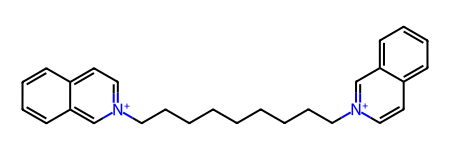

In [33]:
data['Molecule'][2664]

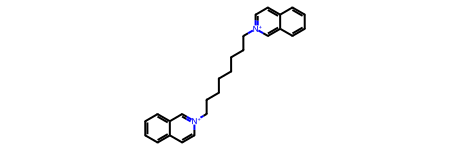

In [34]:
data['Molecule'][3562]

In [35]:
data.loc[(data['molecule_chembl_id'] == 'CHEMBL303574') | (data['molecule_chembl_id'] == 'CHEMBL431519')]

molecule_chembl_id                                     curated_smiles  \
334        CHEMBL303574    CN1CCC2(C)c3cc(OC(=O)NCCCCCN4CCOCC4)ccc3N(C)C12   
4270       CHEMBL431519  CN1CCC2(C)c3cc(OC(=O)NCCCCCCCCCCN4CCOCC4)ccc3N...   

       class  Label     pIC50  \
334   active      1 -3.880814   
4270  active      1 -1.602060   

                                              Molecule  
334   <rdkit.Chem.rdchem.Mol object at 0x785b1f3d4190>  
4270  <rdkit.Chem.rdchem.Mol object at 0x785b1e353ca0>

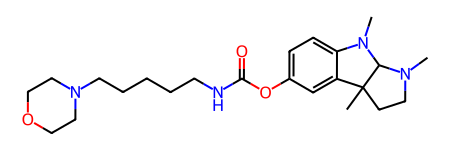

In [36]:
data['Molecule'][334]

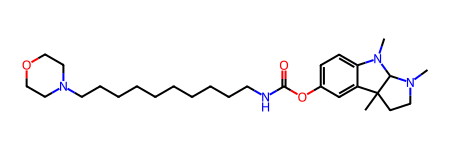

In [37]:
data['Molecule'][4270]

In [38]:
data.loc[(data['molecule_chembl_id'] == 'CHEMBL512096') | (data['molecule_chembl_id'] == 'CHEMBL2234533')]

molecule_chembl_id                                     curated_smiles  \
833        CHEMBL512096  CC1(C)CC(=O)C2C(=Nc3nc4c(c(N)c3C2c2ccccc2)CCCC...   
4497      CHEMBL2234533  CC1(C)CC(=O)C2C(=Nc3nc4c(c(N)c3C2c2ccccc2)CCCC...   

       class  Label     pIC50  \
833   active      1 -2.851258   
4497  active      1 -2.509995   

                                              Molecule  
833   <rdkit.Chem.rdchem.Mol object at 0x785b1e792810>  
4497  <rdkit.Chem.rdchem.Mol object at 0x785b1e3b4120>

These previous two pair of molecules are not identical, the difference is in the number of carbons. Tanimoto wasn't able to differenciate between them.

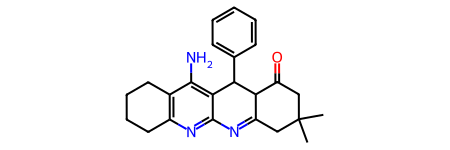

In [39]:
data['Molecule'][833]

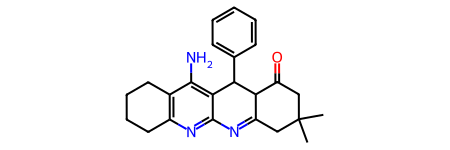

In [40]:
data['Molecule'][4497]

With the pairwise analysis after doing a splitting of the data, 425 entries were identified with Tanimoto Similarity = 1. This could indicate that some of the chemical structures only differe in the presence of the counterion. I'll analyze some of the entries in the next section.

## 6. Look for duplicates in the curated SMILES

In [41]:
data_sorted = data.sort_values(by='pIC50', ascending=False)
data_sorted

molecule_chembl_id                                     curated_smiles  \
5313      CHEMBL4468781  COc1ccc2[nH]cc(CCNC(=O)CCCCCNc3c4c(nc5cc(Cl)cc...   
4862       CHEMBL199670  O=C(CCCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2...   
3863       CHEMBL199861  O=C(CCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2c...   
264       CHEMBL4469239  S=C(CCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2c...   
3882      CHEMBL4780352  COc1cc2c(cc1OC)C(=O)C(=Cc1ccc(OCCCCN[N+]3(C)CC...   
...                 ...                                                ...   
661        CHEMBL102637                             CCSC(=O)OCC[N+](C)(C)C   
2830       CHEMBL334938                  C[N+]1(C)CCOC(O)(c2ccc(C#N)cc2)C1   
402       CHEMBL3597055  COC(=O)C1C(=Nc2ccc(F)cc2)CC(c2ccccc2)N(c2ccc(F...   
4177      CHEMBL1276534            O=C(NP(=O)(NN1CCOCC1)NN1CCOCC1)c1ccccc1   
4711       CHEMBL371798  CN(CCCCCCCOc1ccc2c(c1)OC(=Cc1cccc3ccccc13)C2=O...   

         class  Label     pIC50  \
5313    active      1  5.301030   
4862    active      1  5.301030   
3863    active      1  5.301030   
264     active      1  5.301030   
3882    active      1  5.301030   
...        ...    ...       ...   
661   inactive      0 -7.000000   
2830  inactive      0 -7.064000   
402   inactive      0 -7.179552   
4177  inactive      0 -7.269980   
4711  inactive      0 -7.695482   

                                              Molecule  
5313  <rdkit.Chem.rdchem.Mol object at 0x785b1e286490>  
4862  <rdkit.Chem.rdchem.Mol object at 0x785b1e409b60>  
3863  <rdkit.Chem.rdchem.Mol object at 0x785b1e4f0c80>  
264   <rdkit.Chem.rdchem.Mol object at 0x785b1f3b5690>  
3882  <rdkit.Chem.rdchem.Mol object at 0x785b1e4f1930>  
...                                                ...  
661   <rdkit.Chem.rdchem.Mol object at 0x785b1e7704a0>  
2830  <rdkit.Chem.rdchem.Mol object at 0x785b1e5bf7d0>  
402   <rdkit.Chem.rdchem.Mol object at 0x785b1f3d69d0>  
4177  <rdkit.Chem.rdchem.Mol object at 0x785b1e350740>  
4711  <rdkit.Chem.rdchem.Mol object at 0x785b1e3cff40>  

[5734 rows x 6 columns]

In [42]:
data_sorted.loc[data_sorted.duplicated(subset=['curated_smiles'], keep=False)]

molecule_chembl_id                                     curated_smiles  \
2888        CHEMBL54126                   CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1   
4195        CHEMBL32823  c1ccc2c(NCCCCCCCNc3c4c(nc5ccccc35)CCCC4)c3c(nc...   
701       CHEMBL1912059    O=C(CCCCC1CCSS1)NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2   
4468       CHEMBL194823    O=C(CCCCC1CCSS1)NCCCNc1c2c(nc3cc(Cl)ccc13)CCCC2   
4142      CHEMBL3216655  COc1cc2c(cc1OC)C(=O)C(CC1CCN(CCCNc3c4c(nc5cc(C...   
...                 ...                                                ...   
4876       CHEMBL590824              ON=Cc1cc[n+](COC[n+]2ccc(C=NO)cc2)cc1   
1912       CHEMBL451635              ON=Cc1cc[n+](COC[n+]2ccc(C=NO)cc2)cc1   
3264       CHEMBL291233              ON=Cc1cc[n+](COC[n+]2ccc(C=NO)cc2)cc1   
4190      CHEMBL1081613                      C(=CC[n+]1ccccc1)C[n+]1ccccc1   
3130        CHEMBL32778              ON=Cc1cc[n+](CCC[n+]2ccc(C=NO)cc2)cc1   

         class  Label     pIC50  \
2888    active      1  1.366532   
4195    active      1  0.698970   
701     active      1  0.638272   
4468    active      1  0.602060   
4142    active      1  0.568636   
...        ...    ...       ...   
4876  inactive      0 -6.336260   
1912  inactive      0 -6.336260   
3264  inactive      0 -6.344392   
4190  inactive      0 -6.359835   
3130  inactive      0 -6.409933   

                                              Molecule  
2888  <rdkit.Chem.rdchem.Mol object at 0x785b1e5d97e0>  
4195  <rdkit.Chem.rdchem.Mol object at 0x785b1e351150>  
701   <rdkit.Chem.rdchem.Mol object at 0x785b1e771b60>  
4468  <rdkit.Chem.rdchem.Mol object at 0x785b1e38ef80>  
4142  <rdkit.Chem.rdchem.Mol object at 0x785b1e3331b0>  
...                                                ...  
4876  <rdkit.Chem.rdchem.Mol object at 0x785b1e40a420>  
1912  <rdkit.Chem.rdchem.Mol object at 0x785b1e6c5c40>  
3264  <rdkit.Chem.rdchem.Mol object at 0x785b1e43b1b0>  
4190  <rdkit.Chem.rdchem.Mol object at 0x785b1e350e40>  
3130  <rdkit.Chem.rdchem.Mol object at 0x785b1e6225e0>  

[478 rows x 6 columns]

So, there are several duplicated curated SMILES. I'll explore some of this duplicates.

## 7. Duplicated Molecules

In [43]:
data_sorted.loc[data_sorted['curated_smiles'] == 'CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1']

molecule_chembl_id                    curated_smiles   class  Label  \
2888        CHEMBL54126  CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1  active      1   
3232       CHEMBL211471  CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1  active      1   
2043       CHEMBL278020  CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1  active      1   

         pIC50                                          Molecule  
2888  1.366532  <rdkit.Chem.rdchem.Mol object at 0x785b1e5d97e0>  
3232 -1.274158  <rdkit.Chem.rdchem.Mol object at 0x785b1e439ee0>  
2043 -3.380211  <rdkit.Chem.rdchem.Mol object at 0x785b1e6ea650>

Let's upload the data **BEFORE** being curated

In [44]:
data_no_curated = pd.read_csv('/content/data_class_active_inactive.csv')

In [45]:
mols = data_no_curated.loc[(data_no_curated['molecule_chembl_id'] == 'CHEMBL54126') |
                    (data_no_curated['molecule_chembl_id'] == 'CHEMBL211471') |
                    (data_no_curated['molecule_chembl_id'] == 'CHEMBL278020')]
mols

molecule_chembl_id                                  canonical_smiles  \
2043       CHEMBL278020                  CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1   
2888        CHEMBL54126            CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1.[Br-]   
3232       CHEMBL211471  CN(C)C(=O)Oc1cccc([N+](C)(C)C)c1.COS(=O)(=O)[O-]   

       class  Label     pIC50  
2043  active      1 -3.380211  
2888  active      1  1.366532  
3232  active      1 -1.274158

### 7.1 Counterions

In [46]:
mol_list = [Chem.MolFromSmiles(mol) for mol in mols['canonical_smiles']]

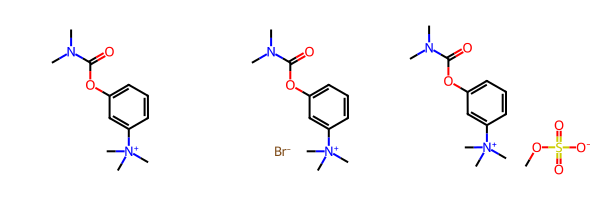

In [47]:
Draw.MolsToGridImage(mol_list)

### 7.2 Stereochemistry

In [48]:
mol_2 = data_no_curated.loc[(data_no_curated['molecule_chembl_id'] == 'CHEMBL512096') |
 (data_no_curated['molecule_chembl_id'] == 'CHEMBL2234533')]

mol_2

molecule_chembl_id                                   canonical_smiles  \
833        CHEMBL512096  CC1(C)CC(=O)C2=C(C1)Nc1nc3c(c(N)c1C2c1ccccc1)C...   
4497      CHEMBL2234533  CC1(C)CC(=O)C2=C(C1)Nc1nc3c(c(N)c1[C@H]2c1cccc...   

       class  Label     pIC50  
833   active      1 -2.851258  
4497  active      1 -2.509995

In [49]:
mol_2_list = [Chem.MolFromSmiles(mol) for mol in mol_2['canonical_smiles']]

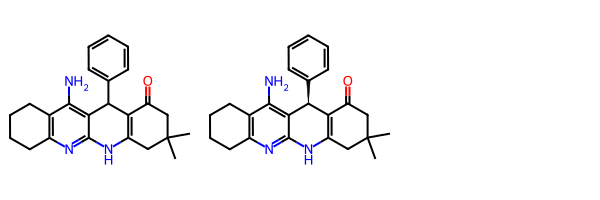

In [50]:
Draw.MolsToGridImage(mol_2_list)

In [51]:
data.loc[(data['molecule_chembl_id'] == 'CHEMBL512096') | (data['molecule_chembl_id'] == 'CHEMBL2234533')]

molecule_chembl_id                                     curated_smiles  \
833        CHEMBL512096  CC1(C)CC(=O)C2C(=Nc3nc4c(c(N)c3C2c2ccccc2)CCCC...   
4497      CHEMBL2234533  CC1(C)CC(=O)C2C(=Nc3nc4c(c(N)c3C2c2ccccc2)CCCC...   

       class  Label     pIC50  \
833   active      1 -2.851258   
4497  active      1 -2.509995   

                                              Molecule  
833   <rdkit.Chem.rdchem.Mol object at 0x785b1e792810>  
4497  <rdkit.Chem.rdchem.Mol object at 0x785b1e3b4120>

In [52]:
print(f"The curated smiles for molecule CHEMBL512096 is: {data['curated_smiles'][833]}")
print(f"The non curated smiles for molecule CHEMBL512096 is: {data_no_curated['canonical_smiles'][833]}")
print(f"The curated smiles for molecule CHEMBL512096 is: {data['curated_smiles'][4497]}")
print(f"The non curated smiles for molecule CHEMBL512096 is: {data_no_curated['canonical_smiles'][4497]}")

The curated smiles for molecule CHEMBL512096 is: CC1(C)CC(=O)C2C(=Nc3nc4c(c(N)c3C2c2ccccc2)CCCC4)C1
The non curated smiles for molecule CHEMBL512096 is: CC1(C)CC(=O)C2=C(C1)Nc1nc3c(c(N)c1C2c1ccccc1)CCCC3
The curated smiles for molecule CHEMBL512096 is: CC1(C)CC(=O)C2C(=Nc3nc4c(c(N)c3C2c2ccccc2)CCCC4)C1
The non curated smiles for molecule CHEMBL512096 is: CC1(C)CC(=O)C2=C(C1)Nc1nc3c(c(N)c1[C@H]2c1ccccc1)CCCC3


## 8. Remove the duplicates

In [53]:
data_clean = data_sorted.loc[~data_sorted.duplicated(subset=['curated_smiles'])]

In [54]:
data_clean

molecule_chembl_id                                     curated_smiles  \
5313      CHEMBL4468781  COc1ccc2[nH]cc(CCNC(=O)CCCCCNc3c4c(nc5cc(Cl)cc...   
4862       CHEMBL199670  O=C(CCCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2...   
3863       CHEMBL199861  O=C(CCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2c...   
264       CHEMBL4469239  S=C(CCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2c...   
3882      CHEMBL4780352  COc1cc2c(cc1OC)C(=O)C(=Cc1ccc(OCCCCN[N+]3(C)CC...   
...                 ...                                                ...   
661        CHEMBL102637                             CCSC(=O)OCC[N+](C)(C)C   
2830       CHEMBL334938                  C[N+]1(C)CCOC(O)(c2ccc(C#N)cc2)C1   
402       CHEMBL3597055  COC(=O)C1C(=Nc2ccc(F)cc2)CC(c2ccccc2)N(c2ccc(F...   
4177      CHEMBL1276534            O=C(NP(=O)(NN1CCOCC1)NN1CCOCC1)c1ccccc1   
4711       CHEMBL371798  CN(CCCCCCCOc1ccc2c(c1)OC(=Cc1cccc3ccccc13)C2=O...   

         class  Label     pIC50  \
5313    active      1  5.301030   
4862    active      1  5.301030   
3863    active      1  5.301030   
264     active      1  5.301030   
3882    active      1  5.301030   
...        ...    ...       ...   
661   inactive      0 -7.000000   
2830  inactive      0 -7.064000   
402   inactive      0 -7.179552   
4177  inactive      0 -7.269980   
4711  inactive      0 -7.695482   

                                              Molecule  
5313  <rdkit.Chem.rdchem.Mol object at 0x785b1e286490>  
4862  <rdkit.Chem.rdchem.Mol object at 0x785b1e409b60>  
3863  <rdkit.Chem.rdchem.Mol object at 0x785b1e4f0c80>  
264   <rdkit.Chem.rdchem.Mol object at 0x785b1f3b5690>  
3882  <rdkit.Chem.rdchem.Mol object at 0x785b1e4f1930>  
...                                                ...  
661   <rdkit.Chem.rdchem.Mol object at 0x785b1e7704a0>  
2830  <rdkit.Chem.rdchem.Mol object at 0x785b1e5bf7d0>  
402   <rdkit.Chem.rdchem.Mol object at 0x785b1f3d69d0>  
4177  <rdkit.Chem.rdchem.Mol object at 0x785b1e350740>  
4711  <rdkit.Chem.rdchem.Mol object at 0x785b1e3cff40>  

[5463 rows x 6 columns]

In [55]:
data.shape

(5734, 6)

In [56]:
data_clean.shape

(5463, 6)

## 9. Repeat the Chemical Similarity

### 9.1 Splitting data

In [57]:
X = data_clean.drop('Label', axis=1)
y = data_clean['Label']

In [58]:
X

molecule_chembl_id                                     curated_smiles  \
5313      CHEMBL4468781  COc1ccc2[nH]cc(CCNC(=O)CCCCCNc3c4c(nc5cc(Cl)cc...   
4862       CHEMBL199670  O=C(CCCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2...   
3863       CHEMBL199861  O=C(CCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2c...   
264       CHEMBL4469239  S=C(CCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2c...   
3882      CHEMBL4780352  COc1cc2c(cc1OC)C(=O)C(=Cc1ccc(OCCCCN[N+]3(C)CC...   
...                 ...                                                ...   
661        CHEMBL102637                             CCSC(=O)OCC[N+](C)(C)C   
2830       CHEMBL334938                  C[N+]1(C)CCOC(O)(c2ccc(C#N)cc2)C1   
402       CHEMBL3597055  COC(=O)C1C(=Nc2ccc(F)cc2)CC(c2ccccc2)N(c2ccc(F...   
4177      CHEMBL1276534            O=C(NP(=O)(NN1CCOCC1)NN1CCOCC1)c1ccccc1   
4711       CHEMBL371798  CN(CCCCCCCOc1ccc2c(c1)OC(=Cc1cccc3ccccc13)C2=O...   

         class     pIC50                                          Molecule  
5313    active  5.301030  <rdkit.Chem.rdchem.Mol object at 0x785b1e286490>  
4862    active  5.301030  <rdkit.Chem.rdchem.Mol object at 0x785b1e409b60>  
3863    active  5.301030  <rdkit.Chem.rdchem.Mol object at 0x785b1e4f0c80>  
264     active  5.301030  <rdkit.Chem.rdchem.Mol object at 0x785b1f3b5690>  
3882    active  5.301030  <rdkit.Chem.rdchem.Mol object at 0x785b1e4f1930>  
...        ...       ...                                               ...  
661   inactive -7.000000  <rdkit.Chem.rdchem.Mol object at 0x785b1e7704a0>  
2830  inactive -7.064000  <rdkit.Chem.rdchem.Mol object at 0x785b1e5bf7d0>  
402   inactive -7.179552  <rdkit.Chem.rdchem.Mol object at 0x785b1f3d69d0>  
4177  inactive -7.269980  <rdkit.Chem.rdchem.Mol object at 0x785b1e350740>  
4711  inactive -7.695482  <rdkit.Chem.rdchem.Mol object at 0x785b1e3cff40>  

[5463 rows x 5 columns]

In [59]:
y

5313    1
4862    1
3863    1
264     1
3882    1
       ..
661     0
2830    0
402     0
4177    0
4711    0
Name: Label, Length: 5463, dtype: int64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### 9.2 Pairwise Chemical Similarity

In [61]:
train_fnpr = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, 1024) for mol in X_train['Molecule']]

In [62]:
train_chembl_id = list(X_train['molecule_chembl_id'])

In [63]:
test_fnpr = [AllChem.GetMorganFingerprintAsBitVect(mol, 2, 1024) for mol in X_test['Molecule']]

In [64]:
test_chembl_id = list(X_test['molecule_chembl_id'])

In [65]:
tc, id = [], []

for i, (fnpr_train, train_id) in enumerate(zip(train_fnpr, train_chembl_id)):
    for j, (fnpr_test, test_id) in enumerate(zip(test_fnpr, test_chembl_id)):
        tc.append(DataStructs.FingerprintSimilarity(fnpr_train, fnpr_test))
        id.append((train_id, test_id))

In [66]:
tc_df = pd.DataFrame(tc, columns=['Tanimoto Similarity'])
tc_df['ID'] = id

In [67]:
tc_df

Tanimoto Similarity                              ID
0                   0.071429   (CHEMBL5181051, CHEMBL400092)
1                   0.109890  (CHEMBL5181051, CHEMBL2088786)
2                   0.115385  (CHEMBL5181051, CHEMBL4555818)
3                   0.101124   (CHEMBL5181051, CHEMBL104355)
4                   0.173333  (CHEMBL5181051, CHEMBL3787502)
...                      ...                             ...
4776405             0.371134  (CHEMBL3642045, CHEMBL3753360)
4776406             0.205882  (CHEMBL3642045, CHEMBL3965046)
4776407             0.152381   (CHEMBL3642045, CHEMBL151861)
4776408             0.172727    (CHEMBL3642045, CHEMBL91432)
4776409             0.074468  (CHEMBL3642045, CHEMBL4072457)

[4776410 rows x 2 columns]

In [68]:
tc_df.sort_values(by='Tanimoto Similarity', ascending=False)

Tanimoto Similarity                              ID
2949519                  1.0  (CHEMBL1642980, CHEMBL1642978)
1147869                  1.0  (CHEMBL1642974, CHEMBL1642977)
3965871                  1.0  (CHEMBL2441671, CHEMBL2441673)
1438662                  1.0    (CHEMBL427249, CHEMBL224433)
599955                   1.0  (CHEMBL5208725, CHEMBL5201779)
...                      ...                             ...
3902148                  0.0    (CHEMBL293896, CHEMBL135086)
139433                   0.0    (CHEMBL512569, CHEMBL136145)
4498752                  0.0   (CHEMBL2238007, CHEMBL341956)
1015361                  0.0   (CHEMBL4067497, CHEMBL341956)
4304372                  0.0    (CHEMBL456156, CHEMBL135086)

[4776410 rows x 2 columns]

In [69]:
filtered_tc_df = tc_df.loc[tc_df['Tanimoto Similarity'] == 1]
filtered_tc_df

Tanimoto Similarity                              ID
77981                    1.0  (CHEMBL1618217, CHEMBL1618106)
78126                    1.0  (CHEMBL1618217, CHEMBL1257525)
93544                    1.0   (CHEMBL1086090, CHEMBL284369)
105557                   1.0  (CHEMBL4059684, CHEMBL4099340)
118354                   1.0  (CHEMBL4204913, CHEMBL4205910)
...                      ...                             ...
4660890                  1.0      (CHEMBL75274, CHEMBL32823)
4740679                  1.0      (CHEMBL73800, CHEMBL32823)
4741658                  1.0  (CHEMBL3343884, CHEMBL3343885)
4757010                  1.0    (CHEMBL224555, CHEMBL224433)
4757129                  1.0    (CHEMBL224555, CHEMBL390737)

[250 rows x 2 columns]

In [70]:
pairs = []

for id1, id2 in filtered_tc_df['ID']:
    loc = data_clean.loc[(data_clean['molecule_chembl_id'] == id1) | (data_clean['molecule_chembl_id'] == id2)]
    smiles1 = loc[loc['molecule_chembl_id'] == id1]['curated_smiles'].iloc[0] if not loc[loc['molecule_chembl_id'] == id1].empty else None
    smiles2 = loc[loc['molecule_chembl_id'] == id2]['curated_smiles'].iloc[0] if not loc[loc['molecule_chembl_id'] == id2].empty else None
    pairs.append((smiles1, smiles2))

In [71]:
pairs[:10]

[('CCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2', 'CCCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2'),
 ('CCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2',
  'CCCCCCCCCCCCNc1c2c(nc3ccc(OC)cc13)CCCC2'),
 ('CCCCCCCNC(=O)Oc1ccc2c(c1)C1CCN(CC)C1C2',
  'CCCCCCNC(=O)Oc1ccc2c(c1)C1CCN(CC)C1C2'),
 ('CCN(CC)CCCCCCCCOc1ccc(C=CC(=O)O)cc1OC',
  'CCN(CC)CCCCCCOc1ccc(C=CC(=O)O)cc1OC'),
 ('COc1ccc(Cn2cc(C(=O)NCCCCCNc3c4c(nc5ccc(OC)cc35)CCCC4)c(=O)c3ccccc32)cc1',
  'COc1ccc(Cn2cc(C(=O)NCCCCCCNc3c4c(nc5ccc(OC)cc35)CCCC4)c(=O)c3ccccc32)cc1'),
 ('CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCNc4c5c(nc6cc(Cl)ccc46)CC4C=C(C)CC5C4)c3C(C1)C2',
  'CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCCCCCNc4c5c(nc6cc(Cl)ccc46)CC4C=C(C)CC5C4)c3C(C1)C2'),
 ('CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCNc4c5c(nc6cc(Cl)ccc46)CC4C=C(C)CC5C4)c3C(C1)C2',
  'CC1=CC2Cc3nc4cc(Cl)ccc4c(NCCCCCCCCNc4c5c(nc6cc(Cl)ccc46)CC4C=C(C)CC5C4)c3C(C1)C2'),
 ('CC[N+]1(Cc2ccccc2[N+](=O)[O-])CCCCCn2c(C)cc(=O)n(c2=O)CCCCC[N+](CC)(Cc2ccccc2[N+](=O)[O-])CCCCCn2c(=O)cc(C)n(c2=O)CCCCC1',
  'CC[N+]1(Cc2ccccc2[N+](=O)[O-])CCC

In [72]:
mols = []

for smiles1, smiles2 in pairs:
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)
    mols.extend([mol1, mol2])

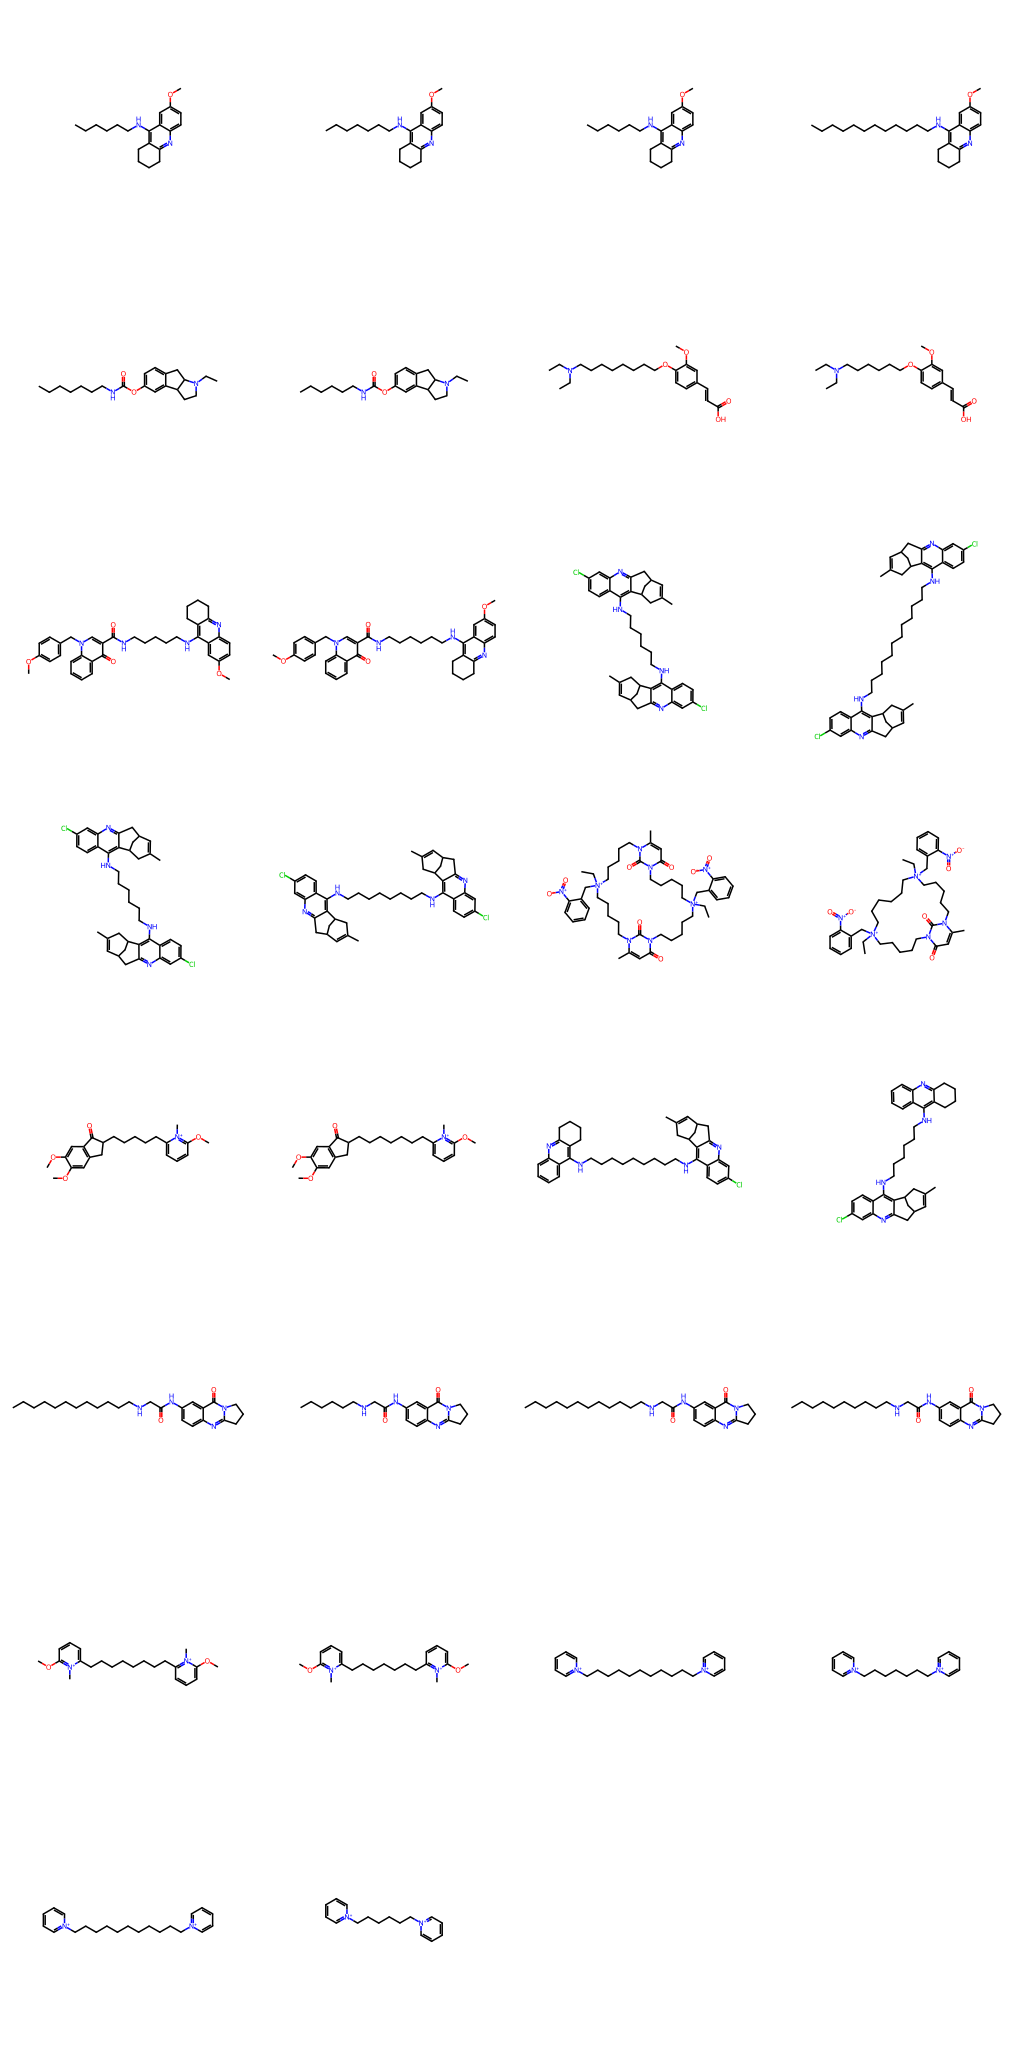

In [73]:
Draw.MolsToGridImage(mols[:30], molsPerRow=4, subImgSize=(340, 340))

Molecules are not the same, even if they were identified as such by the Tanimoto Similarity. It is true that they are very similar, because the main differences are in the number of carbon atoms in the chains. So, if they are used in a ML algorithm is a matter of interpretation, because they are so similar that the system could be "cheating" in the prediction afterwards. However, it is a matter of intrepreting the system and assessing the objectives.

## 11. Butina Cluster

In [78]:
# Inspiration from Pat Walters: https://github.com/PatWalters/workshop/blob/master/clustering/taylor_butina.ipynb
# and Gashaw M. Goshu: https://github.com/gashawmg/Molecular-fingerprints/blob/main/Calculating%20molecular%20fingerprints%20available%20in%20RDkit%20.ipynb

def flexible_butina_cluster(data, cutoff=0.35, precomputed_fps=False, nBits=2048):
    """
    Cluster molecules using the Butina algorithm.

    Parameters:
    - data (list): List of molecules (as RDKit Mol objects) or fingerprints (as BitVects),
                  depending on precomputed_fps.
    - cutoff (float): Distance threshold for clustering.
    - precomputed_fps (bool): Flag to indicate if data contains precomputed fingerprints.
    - nBits (int): Number of bits for the fingerprint. Only relevant if fingerprints need to be computed.

    Returns:
    - list: List of cluster IDs corresponding to each molecule/fingerprint.

    Usage:
    1. If you have precomputed fingerprints:
       >>> results = flexible_butina_cluster(precomputed_fingerprints, precomputed_fps=True)

    2. If you have raw molecules and need to compute fingerprints:
       >>> results = flexible_butina_cluster(list_of_molecules)
    """

    # If fingerprints are not precomputed, compute them
    if not precomputed_fps:
        data = [AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=nBits) for m in data]

    # Calculate pairwise distances
    dists = []
    ndata = len(data)
    for i in range(1, ndata):
        sims = DataStructs.BulkTanimotoSimilarity(data[i], data[:i])
        dists.extend([1-x for x in sims])

    # Apply Butina clustering
    clusters = Butina.ClusterData(dists, ndata, cutoff, isDistData=True)
    cluster_id_list = [0]*ndata
    for idx, cluster in enumerate(clusters, 1):
        for member in cluster:
            cluster_id_list[member] = idx

    return cluster_id_list, data

In [79]:
cluster_id, data = flexible_butina_cluster(data_clean['Molecule'])

In [80]:
len(np.unique(cluster_id))

1763

In [82]:
data_cluster = data_clean.copy()
data_cluster['Cluster ID'] = cluster_id

In [83]:
data_cluster

molecule_chembl_id                                     curated_smiles  \
5313      CHEMBL4468781  COc1ccc2[nH]cc(CCNC(=O)CCCCCNc3c4c(nc5cc(Cl)cc...   
4862       CHEMBL199670  O=C(CCCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2...   
3863       CHEMBL199861  O=C(CCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2c...   
264       CHEMBL4469239  S=C(CCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2c...   
3882      CHEMBL4780352  COc1cc2c(cc1OC)C(=O)C(=Cc1ccc(OCCCCN[N+]3(C)CC...   
...                 ...                                                ...   
661        CHEMBL102637                             CCSC(=O)OCC[N+](C)(C)C   
2830       CHEMBL334938                  C[N+]1(C)CCOC(O)(c2ccc(C#N)cc2)C1   
402       CHEMBL3597055  COC(=O)C1C(=Nc2ccc(F)cc2)CC(c2ccccc2)N(c2ccc(F...   
4177      CHEMBL1276534            O=C(NP(=O)(NN1CCOCC1)NN1CCOCC1)c1ccccc1   
4711       CHEMBL371798  CN(CCCCCCCOc1ccc2c(c1)OC(=Cc1cccc3ccccc13)C2=O...   

         class  Label     pIC50  \
5313    active      1  5.301030   
4862    active      1  5.301030   
3863    active      1  5.301030   
264     active      1  5.301030   
3882    active      1  5.301030   
...        ...    ...       ...   
661   inactive      0 -7.000000   
2830  inactive      0 -7.064000   
402   inactive      0 -7.179552   
4177  inactive      0 -7.269980   
4711  inactive      0 -7.695482   

                                              Molecule  Cluster ID  
5313  <rdkit.Chem.rdchem.Mol object at 0x785b1e286490>           2  
4862  <rdkit.Chem.rdchem.Mol object at 0x785b1e409b60>           2  
3863  <rdkit.Chem.rdchem.Mol object at 0x785b1e4f0c80>           2  
264   <rdkit.Chem.rdchem.Mol object at 0x785b1f3b5690>           2  
3882  <rdkit.Chem.rdchem.Mol object at 0x785b1e4f1930>         980  
...                                                ...         ...  
661   <rdkit.Chem.rdchem.Mol object at 0x785b1e7704a0>         249  
2830  <rdkit.Chem.rdchem.Mol object at 0x785b1e5bf7d0>         454  
402   <rdkit.Chem.rdchem.Mol object at 0x785b1f3d69d0>          31  
4177  <rdkit.Chem.rdchem.Mol object at 0x785b1e350740>         732  
4711  <rdkit.Chem.rdchem.Mol object at 0x785b1e3cff40>         453  

[5463 rows x 7 columns]

In [84]:
clusters = data_cluster.groupby('Cluster ID')['Molecule'].count()
clusters

Cluster ID
1       75
2       58
3       54
4       21
5       40
        ..
1759     1
1760     1
1761     1
1762     1
1763     1
Name: Molecule, Length: 1763, dtype: int64

In [85]:
df_cluster_sorted = data_cluster.sort_values(by="Cluster ID")
df_cluster_sorted

molecule_chembl_id                                     curated_smiles  \
2631       CHEMBL421501  c1ccc2c(NCCCCCCNc3c4c(nc5ccccc35)CCC4)c3c(nc2c...   
1729        CHEMBL75305  c1cnc2nc3c(c(NCCCCCCNc4c5c(nc6ncccc46)CCCC5)c2...   
4032      CHEMBL3235503  c1ccc2c(NCCSSCCNc3c4c(nc5ccccc35)CCCC4)c3c(nc2...   
1312      CHEMBL2147460      CN(C)c1ccccc1CNCCCCCCCNc1c2c(nc3ccccc13)CCCC2   
4135       CHEMBL407320       O=[N+]([O-])OCCCNCCCCNc1c2c(nc3ccccc13)CCCC2   
...                 ...                                                ...   
5236      CHEMBL3605361  C[n+]1ccc2c(c1)c1ccccc1n2CCCCCCCCCn1c2ccccc2c2...   
1825      CHEMBL5219841         COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1   
4990      CHEMBL3621322  CC[N+](CC)(CCCCCn1c(C)cc(=O)n(CCCCC[N+](CC)(CC...   
3617      CHEMBL3585781                        COc1ccc(C(C)NS(N)(=O)=O)cc1   
1192      CHEMBL3585782                      COc1ccc(C(C)NS(N)(=O)=O)cc1OC   

       class  Label     pIC50  \
2631  active      1 -2.060698   
1729  active      1 -0.681241   
4032  active      1 -0.702431   
1312  active      1 -0.714330   
4135  active      1 -0.748188   
...      ...    ...       ...   
5236  active      1  0.481486   
1825  active      1  0.679854   
4990  active      1  0.853872   
3617  active      1  1.571056   
1192  active      1  1.571056   

                                              Molecule  Cluster ID  
2631  <rdkit.Chem.rdchem.Mol object at 0x785b1e5a0120>           1  
1729  <rdkit.Chem.rdchem.Mol object at 0x785b1e68b4c0>           1  
4032  <rdkit.Chem.rdchem.Mol object at 0x785b1e51b1b0>           1  
1312  <rdkit.Chem.rdchem.Mol object at 0x785b1e828200>           1  
4135  <rdkit.Chem.rdchem.Mol object at 0x785b1e332dc0>           1  
...                                                ...         ...  
5236  <rdkit.Chem.rdchem.Mol object at 0x785b1e2635a0>        1759  
1825  <rdkit.Chem.rdchem.Mol object at 0x785b1e6a6b90>        1760  
4990  <rdkit.Chem.rdchem.Mol object at 0x785b1e42e6c0>        1761  
3617  <rdkit.Chem.rdchem.Mol object at 0x785b1e4b8120>        1762  
1192  <rdkit.Chem.rdchem.Mol object at 0x785b1e7f3990>        1763  

[5463 rows x 7 columns]

In [88]:
mols2grid.display(data_cluster, smiles_col = 'curated_smiles', mol_col = 'Molecule',
                  subset = ['class', 'pIC50', 'Cluster ID'], transform ={"pIC50": lambda x: f"{x:.2f}"})

MolGridWidget()

In [89]:
data_cluster.head()

molecule_chembl_id                                     curated_smiles  \
5313      CHEMBL4468781  COc1ccc2[nH]cc(CCNC(=O)CCCCCNc3c4c(nc5cc(Cl)cc...   
4862       CHEMBL199670  O=C(CCCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2...   
3863       CHEMBL199861  O=C(CCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2c...   
264       CHEMBL4469239  S=C(CCCCCNc1c2c(nc3ccccc13)CCCC2)NCCc1c[nH]c2c...   
3882      CHEMBL4780352  COc1cc2c(cc1OC)C(=O)C(=Cc1ccc(OCCCCN[N+]3(C)CC...   

       class  Label    pIC50  \
5313  active      1  5.30103   
4862  active      1  5.30103   
3863  active      1  5.30103   
264   active      1  5.30103   
3882  active      1  5.30103   

                                              Molecule  Cluster ID  
5313  <rdkit.Chem.rdchem.Mol object at 0x785b1e286490>           2  
4862  <rdkit.Chem.rdchem.Mol object at 0x785b1e409b60>           2  
3863  <rdkit.Chem.rdchem.Mol object at 0x785b1e4f0c80>           2  
264   <rdkit.Chem.rdchem.Mol object at 0x785b1f3b5690>           2  
3882  <rdkit.Chem.rdchem.Mol object at 0x785b1e4f1930>         980

In [96]:
cluster_4 = data_cluster.loc[data_clean['Cluster ID'] == 4]
len(cluster_4)

21

In [97]:
mols2grid.display(cluster_4, smiles_col = 'curated_smiles', mol_col = 'Molecule',
                  subset = ['class', 'pIC50', 'Cluster ID'], transform ={"pIC50": lambda x: f"{x:.2f}"})

MolGridWidget()

## 11. Save Data

In [74]:
data_clean.columns

Index(['molecule_chembl_id', 'curated_smiles', 'class', 'Label', 'pIC50',
       'Molecule'],
      dtype='object')

In [75]:
PandasTools.WriteSDF(data_clean, 'data_to_train.sdf', molColName='Molecule', properties=data_clean.columns)